In [1]:
import sys; sys.path.append("../")

import os
import sys
import pickle
from model import *
from SALib.sample import sobol, saltelli
from tqdm import tqdm


import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
USE_TEX = False
if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [25]:
N = 100
mu = 10
sigma = 1
w = np.random.normal(mu, sigma, N)

In [82]:
G = construct_sda_graph(w, alpha=4, b=1/15)

In [83]:
# construct communities and augmented communities
communities = get_communities(G)
community_membership = get_community_membership(G, communities)

augmented_communities = {}
for agent in community_membership:
    comms = community_membership[agent]
    for c in comms:
        if c not in augmented_communities:
            augmented_communities[c] = {agent}
        else:
            augmented_communities[c].add(agent) 
augmented_communities = {k:np.array(list(v)) for k,v in augmented_communities.items()}
del augmented_communities[max(augmented_communities.keys())]

In [84]:
# get community adjacency matrix and degree distribution
adjacency = dict((n, set(nbrdict.keys())) for n, nbrdict in G.adjacency())
node_community_map = get_node_community_map(communities)

community_adjacency = {}
for i,c in enumerate(communities):
    community_adjacency[i] = set()
    for node in c:
        node_neighbours = adjacency[node]
        for neighbour in node_neighbours:
            neighbouring_community = node_community_map[neighbour]
            if neighbouring_community != i:
                community_adjacency[i].add(neighbouring_community)
comm_degrees = [len(x) for x in list(community_adjacency.values())]

16

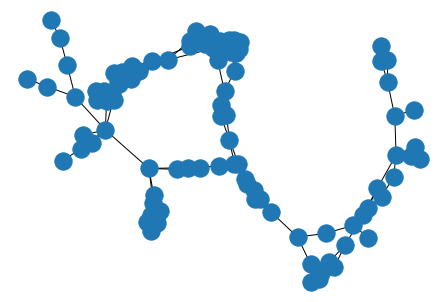

In [91]:
nx.draw(G)
len(augmented_communities)

In [92]:
augmented_communities

{0: array([96, 33, 67, 41, 74, 48, 81, 84, 93, 30]),
 14: array([34, 67, 12, 85, 21, 94, 57, 93, 30]),
 9: array([ 0, 11, 81, 84, 63]),
 1: array([73,  1, 99, 20]),
 11: array([ 1,  6, 71, 73, 82, 51, 87, 62]),
 12: array([ 1, 15, 20, 25, 26]),
 2: array([ 2, 66, 36,  3, 70,  5,  8,  9, 42, 79, 17, 18, 31]),
 5: array([ 3,  5, 39,  9, 31]),
 7: array([ 4, 72,  9,  8, 76, 77, 54, 59]),
 3: array([ 7, 10, 16, 19, 21, 23, 27, 28, 34, 38, 44, 47, 53, 58, 60, 68, 69,
        85, 88, 89, 90, 97, 98]),
 13: array([ 8, 14, 16, 24, 28, 40, 44, 46, 47, 49, 52, 54, 55, 58, 61, 64, 65,
        76, 80, 83, 92]),
 4: array([ 8, 91,  4]),
 6: array([32, 37, 72,  8, 43, 45]),
 8: array([50, 43, 45]),
 15: array([35, 75, 13, 81, 63, 86, 56, 29, 95]),
 10: array([ 0,  6, 73, 75, 11, 78, 82, 51, 22, 29])}

In [93]:
np.sum(w[augmented_communities[0]])

94.43268587201646

In [98]:
np.sum(w[augmented_communities[4]])

34.20291252923316